# DATA analysis

## used promoters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

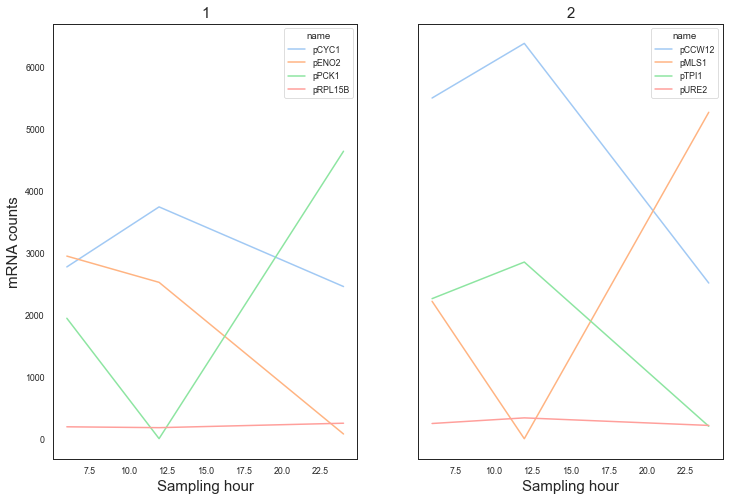

In [2]:
promoters_df = pd.read_csv('../data/raw/promoters.csv')
promoters_df = promoters_df[["name", "NIL_6h_FPKM", "NIL_12h_FPKM", "NIL_24h_FPKM"]]
promoters_df.columns = ['name', 6, 12, 24]
promoters_df = promoters_df.set_index('name')
df_with_prom1 = promoters_df.loc[["pCYC1","pENO2","pPCK1","pRPL15B"]].transpose()
df_with_prom2 = promoters_df.loc[["pCCW12","pMLS1","pTPI1","pURE2"]].transpose()

import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()
sns.set_style("white")
sns.set_palette("pastel")
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.5})

# adding the data to the fig
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8), sharey=True)  # 1 row, 2 columns 

# Adding the DFs
ax1 = df_with_prom1.plot( ax=ax1)
ax2 = df_with_prom2.plot( ax=ax2)

# Adding all the titles
ax1.set_title("1",  fontsize=15)
ax2.set_title("2",  fontsize=15)
ax1.set_ylabel("mRNA counts",  fontsize=15)
ax1.set_xlabel("Sampling hour", fontsize=15)
ax2.set_ylabel("mRNA counts",  fontsize=15)
ax2.set_xlabel("Sampling hour", fontsize=15)
ax1.get_shared_x_axes().join(ax1, ax2)

## DATA wrangling



LCMS data



- Tidy strictosidine data

In [3]:
# Lets read in plate 53 and 54

plate53 = pd.read_csv("../data/raw/023_LC-MS/2nd_library_lcms/Result_table_210927_tmet576_yp53.csv", sep = ',')
plate54 = pd.read_csv("../data/raw/023_LC-MS/2nd_library_lcms/Result_table_211001_tmet581_yp54.csv", sep = ',')



# Stack the DataFrames on top of each other - Lets add the plate 49 from before
unprocessed_lcms_results = pd.concat([ plate53, plate54 ], axis=0)
unprocessed_lcms_results

,data_file,sample_notes,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine
0,210927_TMET576_016.xms,96WP1232_A1,NaN,NaN,1351.268,180064.781,NaN,NaN,2.546823,1123.859574
1,210927_TMET576_017.xms,96WP1232_A2,NaN,NaN,4203.014,146340.297,NaN,NaN,7.921696,913.370971
2,210927_TMET576_018.xms,96WP1232_A3,NaN,NaN,NaN,144634.984,NaN,NaN,NaN,902.727400
3,210927_TMET576_019.xms,96WP1232_A4,586.062,NaN,11989.688,131989.250,1.501260,NaN,22.597750,823.800087
4,210927_TMET576_020.xms,96WP1232_A5,1812.931,NaN,17870.656,130796.781,4.644016,NaN,33.681995,816.357390
...,...,...,...,...,...,...,...,...,...,...
77,211001_TMET581_114.xms,96WP1248_H8,1526.662,NaN,15091.814,167400.484,3.910708,NaN,28.444529,1044.816402
78,211001_TMET581_115.xms,96WP1248_H9,965.164,NaN,11963.110,130024.117,2.472371,NaN,22.547656,811.534871
79,211001_TMET581_116.xms,96WP1248_H10,1988.074,NaN,20066.662,190289.266,5.092664,NaN,37.820951,1187.674860
80,211001_TMET581_117.xms,96WP1248_H11,5787.284,NaN,18192.010,159843.375,14.824745,NaN,34.287672,997.649326


In [4]:
# filtering out all columns that that have Nan in all of the following columns: 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine'
df_filter = unprocessed_lcms_results.dropna(subset=[ 'Amt_uM_Loganin', 'Amt_uM_Secologanin','Amt_uM_Strictosidine', 'Amt_uM_Tryptamine' ],  how='all')

# replacing N.D and N.A. with NaN
df_filter = df_filter.replace('N.D.', np.NaN)
df_filter = df_filter.replace('N.A.', np.NaN)

# Excel contains values both in ug and uM. I'll use uM because values are in a better scale.
# remove cols starting with "Amt_ug_L_" because of redundancy and uM has better scale.
df_filter.drop(df_filter.iloc[:, 2:5], inplace = True, axis = 1)
df_filter

#df_filter
## saving the column names
list_of_coloumn_names = df_filter.columns.values.tolist()
#
## split the sample notes column
df_filter_plates = df_filter['sample_notes'].str.split('_', expand=True)
df_filter_plates = df_filter_plates[[0,1]]
df_filter_plates.columns = ['plate', 'well']
list_of_coloumn_names_2 = df_filter_plates.columns.values.tolist()
#
## Add the to dataframes together
concatenated = pd.concat([df_filter, df_filter_plates], axis=1, ignore_index=True)
concatenated.columns = list_of_coloumn_names + list_of_coloumn_names_2

##add 0 to all nan positions 
concatenated = concatenated.fillna(0)


### Changing the names of the plates to yp53/54
concatenated.loc[concatenated['plate'] == '96WP1232', 'plate'] = 'yp53'
concatenated.loc[concatenated['plate'] == '96WP1248', 'plate'] = 'yp54'

# Change name
lcms_results = concatenated
lcms_results

,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well
0,210927_TMET576_016.xms,96WP1232_A1,180064.781,0.000000,0.0,2.546823,1123.859574,yp53,A1
1,210927_TMET576_017.xms,96WP1232_A2,146340.297,0.000000,0.0,7.921696,913.370971,yp53,A2
2,210927_TMET576_018.xms,96WP1232_A3,144634.984,0.000000,0.0,0.000000,902.727400,yp53,A3
3,210927_TMET576_019.xms,96WP1232_A4,131989.250,1.501260,0.0,22.597750,823.800087,yp53,A4
4,210927_TMET576_020.xms,96WP1232_A5,130796.781,4.644016,0.0,33.681995,816.357390,yp53,A5
...,...,...,...,...,...,...,...,...,...
77,211001_TMET581_114.xms,96WP1248_H8,167400.484,3.910708,0.0,28.444529,1044.816402,yp54,H8
78,211001_TMET581_115.xms,96WP1248_H9,130024.117,2.472371,0.0,22.547656,811.534871,yp54,H9
79,211001_TMET581_116.xms,96WP1248_H10,190289.266,5.092664,0.0,37.820951,1187.674860,yp54,H10
80,211001_TMET581_117.xms,96WP1248_H11,159843.375,14.824745,0.0,34.287672,997.649326,yp54,H11


In [5]:
## changing the well names to incorporate a 0 between the first wells

In [6]:
well_list = lcms_results['well'].to_list()

new_well_list = []
for i in range(len(well_list)): 
    if len(well_list[i]) == 2:
        
        well = str(well_list[i][0:1])+'0'+str(well_list[i][1:2])
        new_well_list.append(well)
        well= ''
        
    else: 
        new_well_list.append(well_list[i])

lcms_results['well'] = new_well_list
lcms_results

,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well
0,210927_TMET576_016.xms,96WP1232_A1,180064.781,0.000000,0.0,2.546823,1123.859574,yp53,A01
1,210927_TMET576_017.xms,96WP1232_A2,146340.297,0.000000,0.0,7.921696,913.370971,yp53,A02
2,210927_TMET576_018.xms,96WP1232_A3,144634.984,0.000000,0.0,0.000000,902.727400,yp53,A03
3,210927_TMET576_019.xms,96WP1232_A4,131989.250,1.501260,0.0,22.597750,823.800087,yp53,A04
4,210927_TMET576_020.xms,96WP1232_A5,130796.781,4.644016,0.0,33.681995,816.357390,yp53,A05
...,...,...,...,...,...,...,...,...,...
77,211001_TMET581_114.xms,96WP1248_H8,167400.484,3.910708,0.0,28.444529,1044.816402,yp54,H08
78,211001_TMET581_115.xms,96WP1248_H9,130024.117,2.472371,0.0,22.547656,811.534871,yp54,H09
79,211001_TMET581_116.xms,96WP1248_H10,190289.266,5.092664,0.0,37.820951,1187.674860,yp54,H10
80,211001_TMET581_117.xms,96WP1248_H11,159843.375,14.824745,0.0,34.287672,997.649326,yp54,H11


## Merge Plate design yp48-52 metadata into single csv file


In [7]:
# importing xls file
xls = pd.ExcelFile('../data/raw/023_LC-MS/excel_files/plateDesign_yp53-54_MIA-HA-111-145.xlsx')

# reading the different sheets
df1 = pd.read_excel(xls, 'yp53_reallocated')  # plate 53
df1["plate"] = 'yp53' 

df2 = pd.read_excel(xls, '111-115_121-125_136-140-145yp54') # plate 54
df2["plate"] = 'yp54' 


In [8]:
results_merged = pd.concat([df1, df2], ignore_index=True)

In [9]:
results_merged

,position,Sample name,Cellular compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,Genotype,Date of sampling,old position,plate
0,A01,20210922MIA-HA-116_1,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,1.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A01,yp53
1,A02,20210922MIA-HA-116_2,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,2.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A02,yp53
2,A03,20210922MIA-HA-116_3,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,3.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A03,yp53
3,A04,20210922MIA-HA-116_4,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,4.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A04,yp53
4,A05,20210922MIA-HA-117_1,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,1.0,MIA-HA-117,SmusG8H AanCPR,20210922.0,A05,yp53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
188,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
189,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
190,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54


In [10]:
results_merged.to_csv('../data/processed/023_LC-MS/yp53-54_meta_LL.csv', header = True, index = False)

In [11]:
# read into a dataframe
PlateDesign = pd.read_csv('../data/processed/023_LC-MS/yp53-54_meta_LL.csv') 
PlateDesign

,position,Sample name,Cellular compartment,Medium,Sample Type,Temperature (C),Timepoint (h),Cultivation Container ID/Position,Operator Name,Replicate #,Strain,Genotype,Date of sampling,old position,plate
0,A01,20210922MIA-HA-116_1,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,1.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A01,yp53
1,A02,20210922MIA-HA-116_2,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,2.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A02,yp53
2,A03,20210922MIA-HA-116_3,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,3.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A03,yp53
3,A04,20210922MIA-HA-116_4,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,4.0,MIA-HA-116,VminG8H AanCPR,20210922.0,A04,yp53
4,A05,20210922MIA-HA-117_1,Extracellular Region,YPD,Specimen,30.0,144.0,NaN,Christine Møller Pedersen,1.0,MIA-HA-117,SmusG8H AanCPR,20210922.0,A05,yp53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,H08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
188,H09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
189,H10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54
190,H11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yp54


In [12]:
#pd.set_option('display.max_rows', 100)


In [13]:
# we take the columns that we are interested in
PlateDesign= PlateDesign[['plate','position','Strain', 'Replicate #', 'Genotype', 'Medium']]
# rename them
PlateDesign.columns = ['plate', 'well', 'strain','col_no', 'genotype', 'medium']
PlateDesign

,plate,well,strain,col_no,genotype,medium
0,yp53,A01,MIA-HA-116,1.0,VminG8H AanCPR,YPD
1,yp53,A02,MIA-HA-116,2.0,VminG8H AanCPR,YPD
2,yp53,A03,MIA-HA-116,3.0,VminG8H AanCPR,YPD
3,yp53,A04,MIA-HA-116,4.0,VminG8H AanCPR,YPD
4,yp53,A05,MIA-HA-117,1.0,SmusG8H AanCPR,YPD
...,...,...,...,...,...,...
187,yp54,H08,NaN,NaN,NaN,NaN
188,yp54,H09,NaN,NaN,NaN,NaN
189,yp54,H10,NaN,NaN,NaN,NaN
190,yp54,H11,NaN,NaN,NaN,NaN


In [14]:
# Merge our lcms file with the genotype/strain 
lcms_platedesign = pd.merge(lcms_results, PlateDesign, left_on=['plate','well'], right_on = ['plate','well'])
lcms_platedesign

,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well,strain,col_no,genotype,medium
0,210927_TMET576_016.xms,96WP1232_A1,180064.781,0.000000,0.0,2.546823,1123.859574,yp53,A01,MIA-HA-116,1.0,VminG8H AanCPR,YPD
1,210927_TMET576_017.xms,96WP1232_A2,146340.297,0.000000,0.0,7.921696,913.370971,yp53,A02,MIA-HA-116,2.0,VminG8H AanCPR,YPD
2,210927_TMET576_018.xms,96WP1232_A3,144634.984,0.000000,0.0,0.000000,902.727400,yp53,A03,MIA-HA-116,3.0,VminG8H AanCPR,YPD
3,210927_TMET576_019.xms,96WP1232_A4,131989.250,1.501260,0.0,22.597750,823.800087,yp53,A04,MIA-HA-116,4.0,VminG8H AanCPR,YPD
4,210927_TMET576_020.xms,96WP1232_A5,130796.781,4.644016,0.0,33.681995,816.357390,yp53,A05,MIA-HA-117,1.0,SmusG8H AanCPR,YPD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,211001_TMET581_114.xms,96WP1248_H8,167400.484,3.910708,0.0,28.444529,1044.816402,yp54,H08,NaN,NaN,NaN,NaN
164,211001_TMET581_115.xms,96WP1248_H9,130024.117,2.472371,0.0,22.547656,811.534871,yp54,H09,NaN,NaN,NaN,NaN
165,211001_TMET581_116.xms,96WP1248_H10,190289.266,5.092664,0.0,37.820951,1187.674860,yp54,H10,NaN,NaN,NaN,NaN
166,211001_TMET581_117.xms,96WP1248_H11,159843.375,14.824745,0.0,34.287672,997.649326,yp54,H11,NaN,NaN,NaN,NaN


## YP53+54

*** Experiment
1. Check if MIA-HA-x strains produces MIA's 

Strains  
1. YP53

Media feed: 0.2 mM geraniol & 1 mM tryptamine
1. YP + 2 % glucose + feed


Cultivation 30C, 300 rpm 
1. (d-2): Inoculate precultures. Transfer 20 of YP48 g.stock to 80 media 1 (-feed). 
2. (d0):  Inoculate maincultures. Transfer 10 of preculture to  500 media 1 and media 2
3. (e6): transfer 180 ul -> analytics filter and add standard
    6. Measure MIAs (extracellular loganin)
4. (TBD): Khem run plate
5. (TBD): Data analysis


*** Experiment:
- Strains: 4 colonies from each of 35 library plates. Each plate has specific combination of G8H and CPR but any of 4 possible promoter combinations
- Media: YP + 2 % glucose + feed 0.2 mM geraniol & 1 mM tryptamine
- Sampling: day 6

In [15]:
plate53

,data_file,sample_notes,Amt_ug_L_Loganin,Amt_ug_L_Secologanin,Amt_ug_L_Strictosidine,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine
0,210927_TMET576_016.xms,96WP1232_A1,NaN,NaN,1351.268,180064.781,NaN,NaN,2.546823,1123.859574
1,210927_TMET576_017.xms,96WP1232_A2,NaN,NaN,4203.014,146340.297,NaN,NaN,7.921696,913.370971
2,210927_TMET576_018.xms,96WP1232_A3,NaN,NaN,NaN,144634.984,NaN,NaN,NaN,902.727400
3,210927_TMET576_019.xms,96WP1232_A4,586.062,NaN,11989.688,131989.250,1.501260,NaN,22.597750,823.800087
4,210927_TMET576_020.xms,96WP1232_A5,1812.931,NaN,17870.656,130796.781,4.644016,NaN,33.681995,816.357390
...,...,...,...,...,...,...,...,...,...,...
82,210927_TMET576_118.xms,96WP1232_H8,1186.121,NaN,16399.268,137948.813,3.038375,NaN,30.908774,860.996211
83,210927_TMET576_119.xms,96WP1232_H9,1267.036,NaN,17303.230,132422.063,3.245648,NaN,32.612530,826.501454
84,210927_TMET576_120.xms,96WP1232_H10,1043.776,NaN,12050.107,119852.172,2.673744,NaN,22.711625,748.047510
85,210927_TMET576_121.xms,96WP1232_H11,6348.183,NaN,29135.396,141877.813,16.261548,NaN,54.913387,885.518743


In [16]:
control_strict_df = lcms_platedesign.loc[lcms_platedesign['strain'] == 'MIA-CH-A2']
df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()
print(df_mean)
control_strict_df

28.1150946125


,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well,strain,col_no,genotype,medium
81,210927_TMET576_117.xms,96WP1232_H7,148983.953,2.317657,0.0,26.227450,929.871133,yp53,H07,MIA-CH-A2,1.0,NaN,YPD
82,210927_TMET576_118.xms,96WP1232_H8,137948.813,3.038375,0.0,30.908774,860.996211,yp53,H08,MIA-CH-A2,2.0,NaN,YPD
83,210927_TMET576_119.xms,96WP1232_H9,132422.063,3.245648,0.0,32.612530,826.501454,yp53,H09,MIA-CH-A2,3.0,NaN,YPD
84,210927_TMET576_120.xms,96WP1232_H10,119852.172,2.673744,0.0,22.711625,748.047510,yp53,H10,MIA-CH-A2,4.0,NaN,YPD


In [17]:
#plate53 = lcms_platedesign.loc[lcms_platedesign['plate'] == 'yp53']
#plate54 = lcms_platedesign.loc[lcms_platedesign['plate'] == 'yp54']
#
## Getting the controls from 53
#control_strict_df1 = plate53.loc[plate53['well'] == 'H07'] # No data on this by lcms apparently 
#control_strict_df2 = plate53.loc[plate53['well'] == 'H08']
#control_strict_df3 = plate53.loc[plate53['well'] == 'H09']
#control_strict_df4 = plate53.loc[plate53['well'] == 'H10']
#
#
## Getting the controls from 53
#control_strict_df5 = plate54.loc[plate54['well'] == 'F08'] # No data on this by lcms apparently 
#control_strict_df6 = plate54.loc[plate54['well'] == 'F09']
#control_strict_df7 = plate54.loc[plate54['well'] == 'F10']
#control_strict_df8 = plate54.loc[plate54['well'] == 'F11']
#
#
## Control df
#control_strict_df =  pd.concat([control_strict_df1, control_strict_df2,control_strict_df3, 
#                                control_strict_df4, control_strict_df5, control_strict_df6, 
#                                control_strict_df7, control_strict_df8], axis=0, ignore_index=True)
#
#df_mean = control_strict_df["Amt_uM_Strictosidine"].mean()
#print(df_mean)
#control_strict_df

## Normalize strictosidine productions

In [18]:
# make a copy and a new row
norm_strict_df = lcms_platedesign.copy()
norm_strict_df['norm_strict_%'] = 0

# normalize that row
for index, row in norm_strict_df.iterrows():
    normalized = ((row['Amt_uM_Strictosidine']/df_mean)*100)
    norm_strict_df.at[index, 'norm_strict_%'] = normalized

    
# Sort the data
sorted_df = norm_strict_df.sort_values(by='norm_strict_%', ascending=False)
sorted_df = sorted_df.reset_index()


# Lets remove Mia-CM3 - the control
#sorted_df = sorted_df[sorted_df['strain'] != 'MIA-CM-3' ]
sorted_df_lcms = sorted_df #[sorted_df['strain'] != 'MIA-CH-A2' ]

sorted_df_lcms

,index,data_file,sample_notes,Amt_ug_L_Tryptamine,Amt_uM_Loganin,Amt_uM_Secologanin,Amt_uM_Strictosidine,Amt_uM_Tryptamine,plate,well,strain,col_no,genotype,medium,norm_strict_%
0,85,210927_TMET576_121.xms,96WP1232_H11,141877.813,16.261548,0.0,54.913387,885.518743,yp53,H11,MIA-CM-3,1.0,NaN,YPD,195.316389
1,44,210927_TMET576_063.xms,96WP1232_D9,124164.867,7.054980,0.0,47.692027,774.964842,yp53,D09,MIA-HA-132,1.0,SmusG8H RseCPR,YPD,169.631396
2,29,210927_TMET576_047.xms,96WP1232_C6,151006.359,8.910505,0.0,44.848557,942.493815,yp53,C06,MIA-HA-128,2.0,RsepG8H CloCPR,YPD,159.517718
3,6,210927_TMET576_022.xms,96WP1232_A7,131414.891,7.860359,0.0,44.719792,820.215273,yp53,A07,MIA-HA-117,3.0,SmusG8H AanCPR,YPD,159.059724
4,49,210927_TMET576_083.xms,96WP1232_E2,148120.250,5.506115,0.0,40.809806,924.480402,yp53,E02,MIA-HA-133,2.0,RsepG8H RseCPR,YPD,145.152656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,74,210927_TMET576_110.xms,96WP1232_G3,211609.719,0.000000,0.0,0.000000,1320.744720,yp53,G03,MIA-HA-144,3.0,CroG8H AniCPR,YPD,0.000000
164,75,210927_TMET576_111.xms,96WP1232_G4,186587.766,0.000000,0.0,0.000000,1164.572251,yp53,G04,MIA-HA-144,4.0,CroG8H AniCPR,YPD,0.000000
165,76,210927_TMET576_112.xms,96WP1232_G5,184884.563,0.000000,0.0,0.000000,1153.941849,yp53,G05,n.ctr(36),1.0,NaN,YPD,0.000000
166,86,210927_TMET576_122.xms,96WP1232_H12,138742.094,0.000000,0.0,0.000000,865.947410,yp53,H12,BLANK,1.0,NaN,YPD,0.000000


# Plotting plate 53

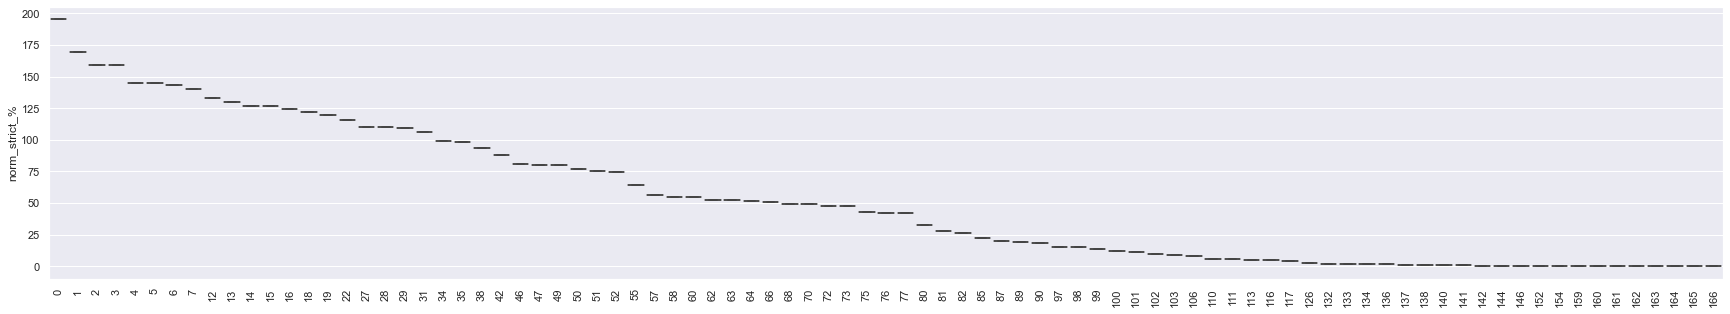

In [19]:
# Plotting plate 53
plate53 = sorted_df_lcms.loc[sorted_df_lcms['plate'] == 'yp53']

import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


box_plot=sns.boxplot(x=plate53.index, y='norm_strict_%',data=plate53)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

# plotting plate 54

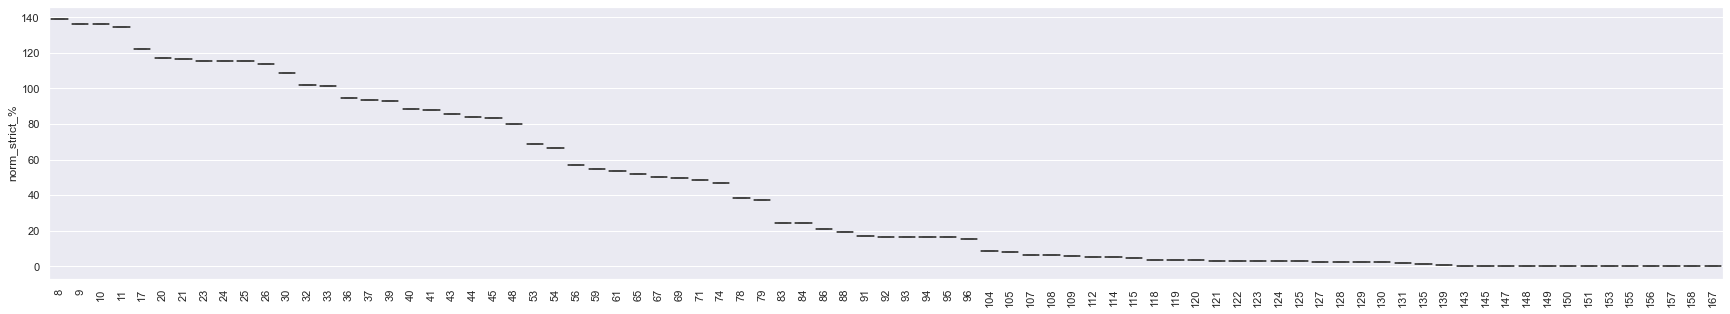

In [20]:
# Plotting plate 53
plate54 = sorted_df_lcms.loc[sorted_df_lcms['plate'] == 'yp54']

import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


box_plot=sns.boxplot(x=plate54.index, y='norm_strict_%',data=plate54)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

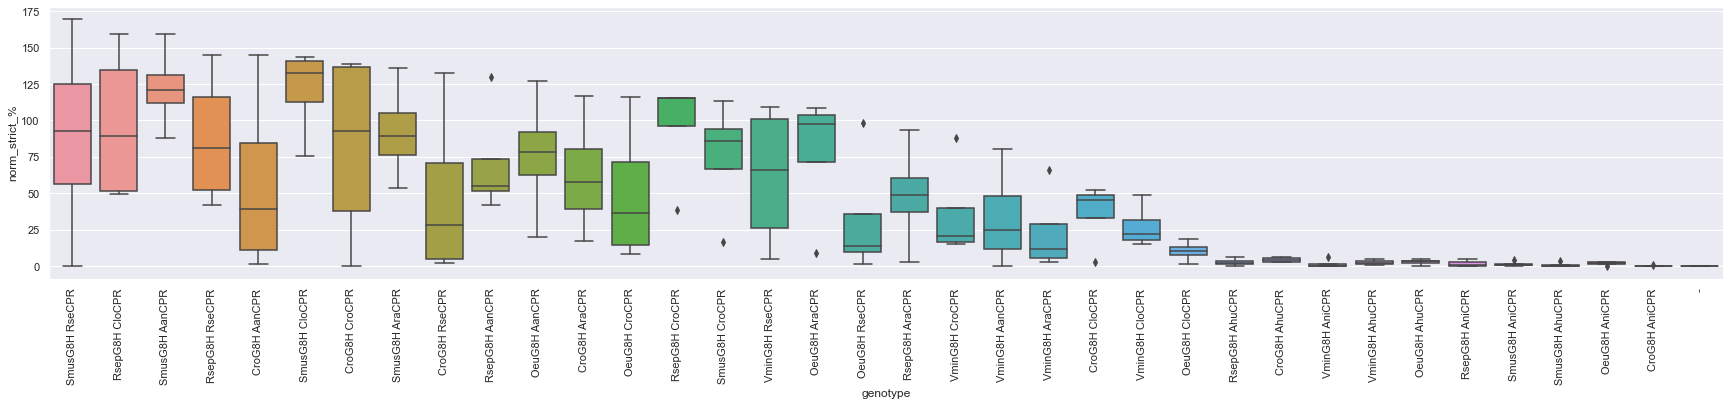

In [21]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,5)})


box_plot=sns.boxplot(x='genotype', y='norm_strict_%',data=sorted_df_lcms)
oc, labels = plt.xticks()
box_plot.set_xticklabels(labels, rotation=90)
#makes sure we dont see the labels
None

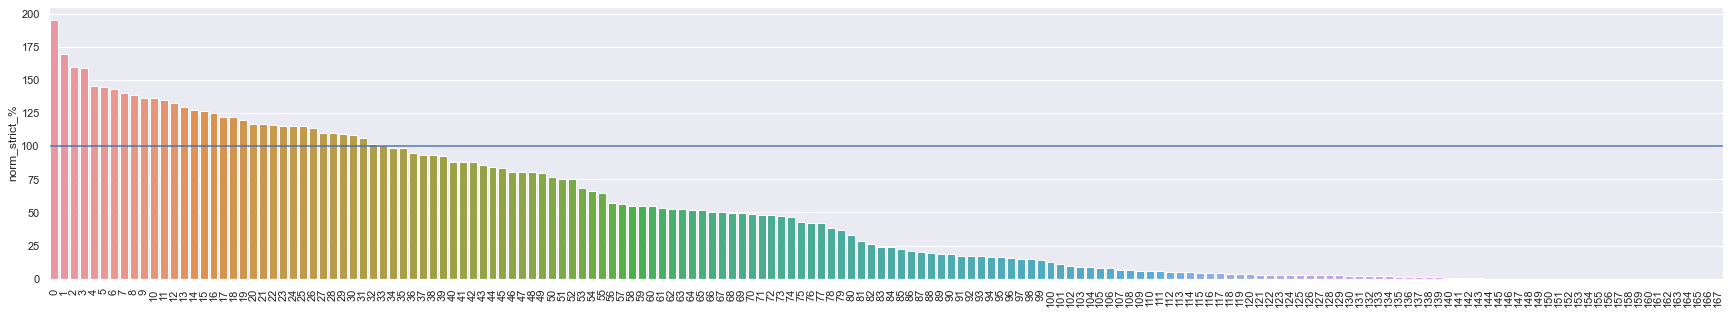

In [22]:
histogram = sns.barplot(data=sorted_df_lcms, x=sorted_df_lcms.index, y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

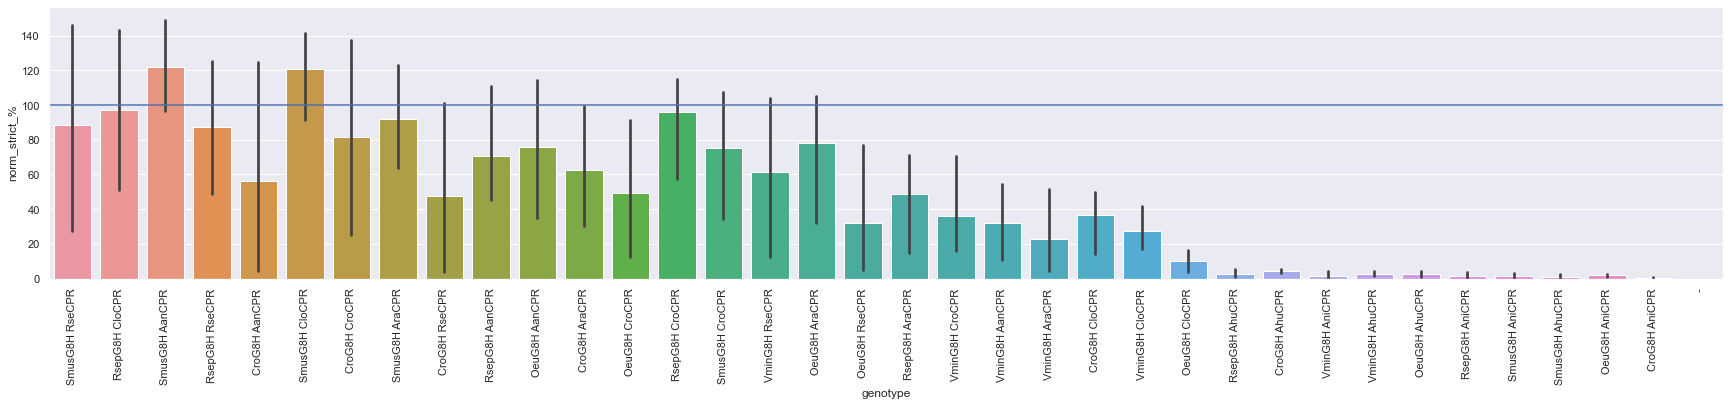

In [23]:
histogram = sns.barplot(data=sorted_df_lcms, x='genotype', y='norm_strict_%')
histogram.axhline(100)

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)
# this makes sure the labels are not shown
None

# Genotyping

Purpose: Determine promoters from library strains to enable ML based sampling of library space

Methods:
DNA sequencing of assembled clusters. Genomic DNA was extracted from
overnight cultures using the LiOAc/SDS method adapted to a 96-well microtiter
plate format. Each extract was used as a template in 2 PCR reactions spanning
the 2 integrated promoter gene pairs and amplifying from 2500 to 3200 bp. The PCR
products were validated using gel electrophoresis and sequenced
using PlateSeq PCR Kits (Eurofins) according to the manufacturer’s instructions.

From the gel results, a PCR reaction was considered as trusted if it showed a
strong band of the correct size; not trusted if it showed a strong band of the wrong
size, and as no information (NI) gained if it showed a weak or no band. 

From the
sequencing results, a sequencing reaction was considered as trusted if it showed an
unambiguous sequence of the expected length (i.e., only limited by length of PCR
fragment, stretches of the same nucleotide in the promoter or of ~1 kb limit of
sanger sequencing reactions), not trusted if it showed an unambiguous sequence of
the expected length with an assembly error, and NI gained if there were no or bad
sequence results. If one or more sequencing results from the same strain showed
double peaks in the promoter region the strain was considered as a double
population. 

Finally, the promoter was noted as a failed assembly if either gel
and or sequencing results were considered not trusted, as NI if the sequencing
result was NI and else as the promoter predicted by pairwise alignment between
sequencing results and promoter sequence.

## Sequencing

### Submission
[Documents folder](/Users/Christine/Documents/Speciale/g8h_cpr_library/data/raw/010_Sequencing files/Sanger/Submission)


Eurofins     | SDP_ID | cassette
------------ | ------ | --------
PCR_00020748 | yp53   | g8h
PCR_00020750 | yp54   | g8h
PCR_00020747 | yp53   | cpr
PCR_00020749 | yp54   | cpr

In plateseq kits well h12 is reserved for quality control.
In all 6 plates yp49-51 for g8h & cpr well h12 contains medium control which do not need to be sequenced. Thus no need to rearrange samples.

### Download and movement of files to correct folders
[Eurofins Results](https://eurofinsgenomics.eu/pages/core/trackorder.aspx?orderRef=11107622012-1&secretRef=7ff4935d-97b7-4c01-be2c-744caedc1a97)



In [24]:
import os

path = '../data/raw/10_Sanger_results/'
files = os.listdir(path)
files

In [25]:
yp53_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp53_g8h_Run1.xlsx')
yp53_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp53_cpr_Run1.xlsx')
yp54_g8h = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp54_g8h_Run1.xlsx')
yp54_cpr = pd.read_excel('../data/raw/10_Sanger_results/PlateReport_yp54_cpr_Run1.xlsx')


# list of all the dataframes
sequencing_plates = [yp53_g8h, yp53_cpr, yp54_g8h, yp54_cpr]

In [26]:
def slicing_and_naming_seq_plates(sequencing_plates, where_to_slice = 7) -> list: 

    # changing column names and slicing
    for i in range(len(sequencing_plates)): 
        sequencing_plates[i].columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used")#sequencing_plates[0].iloc[6]
        sequencing_plates[i] = sequencing_plates[i][where_to_slice:]
        
    return sequencing_plates


In [27]:
from constrain.lab.PCR import det_elon_time

In [28]:
from constrain.test.genotyping import *

ModuleNotFoundError: No module named 'constrain.test'

In [ ]:
# making all values floats
def plat_seq_data_wrangler(sequencing_plates:list) -> list:

    list_with_dfs =[]
    
    for i in range(len(sequencing_plates)):
        # taking only a subset of the dataframe:
        numeric_values = sequencing_plates[i][["AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used"]]

        # if values are non nummeric make them NaN
        numeric_values = numeric_values.replace('n.a.', np.NaN)

        # Making them numeric
        numeric_values = numeric_values.apply(pd.to_numeric, errors='coerce')

        # Adding names column
        name_column = sequencing_plates[i]["Sample-Name"]
        number_column = sequencing_plates[i]["Number"]
        
        # Adding them to the dataframe
        data1 = pd.concat([number_column, name_column,numeric_values], axis = 1)
        list_with_dfs.append(data1)

    return list_with_dfs

In [ ]:
def plate_AvgQual(list_of_dfs_numeric:list, Avg_qual = 50, used_bases = 25 ) -> list:
    
    # Initialize
    filtered_plates = []

    for i in range(len(list_of_dfs_numeric)):
        # Filter 
        filter_Avg_qual = list_of_dfs_numeric[i][list_of_dfs_numeric[i]["AvgQual"] > Avg_qual ]
        filer_used_bases = filter_Avg_qual[filter_Avg_qual["used"] > used_bases ]
        # Save the filtered plates
        filtered_plates.append(filer_used_bases)
    
    return filtered_plates

In [ ]:
def split_df_names(df_names_column, which_column_to_split1 = 0, which_column_to_split2 = 2 ) -> list: 
    
    df_with_names_split =[]
    
    for i in range(len(df_names_column)):
        # splitting
        df_filter_plates = df_names_column[i]['Sample-Name'].str.split('_', expand=True)
        
        # selecting
        column1 = df_filter_plates[which_column_to_split1]
        column2 = df_filter_plates[which_column_to_split2]
        #column3 = df_filter_plates[3:]

        
        # concating
        concatenated = pd.concat([df_names_column[i], column1, column2], axis=1, ignore_index=False)
        
        # changing names 
        concatenated.columns = ("Number", "Sample-Name", "AvgQual", "Length", "GoodQualFrom","GoodQualTo", "used", 'plate', 'well')
        
        # save 
        df_with_names_split.append(concatenated)
        
    return df_with_names_split

In [ ]:
def concatenating_list_of_dfs(list_of_dfs:list): 
    ''' concatenating dataframes '''
    assembled_dfs = pd.concat(list_of_dfs, axis=0, ignore_index=False)
    
    return assembled_dfs

### Data wrangling of plateSeq2 excel files

In [ ]:
#Slicing plate data
sliced_plates = slicing_and_naming_seq_plates(sequencing_plates)

# Making the values numeric
list_of_dfs = plat_seq_data_wrangler(sliced_plates)

#filter them on their 
filtered_plates = plate_AvgQual(list_of_dfs)

# Split names
split_df = split_df_names(filtered_plates)

# concatenating the plates
all_data_frames = concatenating_list_of_dfs(split_df)

# Changing names
#merged_with_genotyping = pd.merge(sorted_df_lcms, all_data_frames, left_on=['plate','well'], right_on = ['plate','well'])
#merged_with_genotyping

all_data_frames

In [ ]:
## Adding a zero to all the numers before 10
wells = []
plates = []
for index, row in all_data_frames.iterrows():
    if len(row['well']) == 2: 
        letter, number = row['well'][0:1], row['well'][1:2]
        #print(letter, number)
        row['well'] = letter + '0' + number
        wells.append(row['well'])
    else: 
        wells.append(row['well'])
        
    if row['plate'] == 'yp53re':
        plates.append('yp53')
        
    else:
        plates.append('yp54')
        
    
        
all_data_frames['well'] = wells
all_data_frames['plate'] = plates

all_data_frames

### ALl reads vs used bases 

In [ ]:
concating_all_plates_with_bad_reads = concatenating_list_of_dfs(sequencing_plates)
# Making the values numeric
concating_all_plates_with_bad_reads["AvgQual"] = pd.to_numeric(concating_all_plates_with_bad_reads["AvgQual"])

concating_all_plates_with_bad_reads

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=concating_all_plates_with_bad_reads, x="used", y="AvgQual", hue="AvgQual")
None

### AvgQual > 50 reads vs used bases 

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.scatterplot(data=all_data_frames, x="used", y="AvgQual", hue="AvgQual")
#g = sns.scatterplot(x="AvgQual", y="used", data=concating_all_plates_with_bad_reads)
None

### Infering promoter to sample relationship

### sanger reports

#### primers

In [ ]:
from Bio import SeqIO

In [ ]:
pad_pG8H_fw = SeqIO.read('../notebooks/pad_pG8H_fw.fasta', format = 'fasta')
pad_pCPR_fw = SeqIO.read('../notebooks/pad_pCPR_fw.fasta', format = 'fasta')
pad_pCPR_fw

primers_for_seq = [pad_pG8H_fw, pad_pCPR_fw]
primers_for_seq

In [ ]:
type(pad_pG8H_fw)

### promoter

In [ ]:
pCPR = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pCPR_sites.gb', format= 'gb'):
    pCPR.append(seq_record)
    
pG8H = []
for seq_record in SeqIO.parse('../data/promoter_gb_files/pG8H_sites.gb', format= 'gb'):
    pG8H.append(seq_record)
    
    
pG8H = [site for site in pG8H]

templates = pCPR+pG8H

In [ ]:
pG8H

In [ ]:
path = '../data/raw/10_Sanger_results/ab1_second_round'
files = os.listdir(path)

In [ ]:

reads = []
for read in files:
    if read != '.ipynb_checkpoints': 
        reads.append(SeqIO.read('../data/raw/10_Sanger_results/ab1_second_round/'+read, 'abi'))#
reads[0:20]

In [ ]:
read

###  New sequencing module

getting the hits that have a proper quality:
    

In [ ]:
type(templates[0])

## Aligning promoters to reads - infer promoter alignment

In [ ]:
list_of_promoters = ["pCYC1", "pENO2","pPCK1","pRPL15B", "pCCW12", "pTPI1","pMLS1","pURE2"]
numbers_list = [5, 7,6, 8, 1, 2, 3, 4]

for i in range(len(templates)): 
    templates[i].description = numbers_list[i]
    
templates

## New list 

Since the library only was made with four promoters we will fetch those out so we dont have to align with the rest



In [ ]:
templates = [templates[0],  templates[2],  templates[4],  templates[5]]

In [ ]:
all_data_frames

In [ ]:
# lets limit the alingment to only reads that are of proper quality
sample_names = all_data_frames['Sample-Name'].tolist()
print(len(sample_names))

good_samples = []
for i in range(len(reads)):
    for j in range(len(sample_names)): 
        if reads[i].name == sample_names[j]: 
            good_samples.append(reads[i])
            
print(len(good_samples))
print(len(reads))

In [ ]:
from Bio import pairwise2

def pairwise_alignment_of_templates(reads:list, templates:list, primers:list) -> dict:
    '''Infers relationship of templates to reads based on highest score from a pairwise alignment '''
    
    best_scores = []
    read_list = []
    template_list = []
    template_number_list = []

    for i in range(len(reads)):

        sample = reads[i].seq.replace("N", "")
        
        # If we see the primers in the sample we the alignment will start from there
        for k in range(len(primers)):
            start = sample.find(primers[k].seq)
            
            if start != -1: 
                sample[start:]
            else: 
                continue

        # Aling with templates
        if len(sample) > 25:
            score = 0.0
            for j in range(len(templates)): 
                template = templates[j].seq

                # Align # identical = 1, non-identical = -2 , gap = -2 , extending gap = -2
                #alignments = pairwise2.align.globalms(template, sample,2, -2, -3, -3)
                alignments = pairwise2.align.localxx(template, sample)

    
                # take the first and highest score 
                alignment_score = float(alignments[0].score)

                # Get the best alignment of them all 
                if alignment_score > score: 
                    score = alignment_score
                    temp_name = templates[j].name
                    temp_number = templates[j].description
                    read_name = reads[i].name                

        #Saving the alignmets and their names
        #if read_name not in read_list: 
        best_scores.append(score)
        read_list.append(read_name)
        template_list.append(temp_name)
        template_number_list.append(temp_number)


    # Making a pandas. dataframe
    df_promoters = pd.DataFrame()
    df_promoters['Sample-Name']  = read_list
    df_promoters['inf_promoter_name'] = template_list
    df_promoters['align_score'] = best_scores
    df_promoters['inf_promoter'] = template_number_list
  
    
    return df_promoters

In [ ]:
len(templates)

## Aligning with homemade functions

In [ ]:
%%time

df_alignment = pairwise_alignment_of_templates(reads,templates, primers_for_seq)
#df_alignment = pairwise_alignment_of_templates(reads,templates )

df_alignment

In [ ]:
col_list =  list(df_alignment["align_score"])
print(col_list)

In [ ]:
minvalue = df_alignment['align_score'].min()
minvalue

In [ ]:
df_align_sort = df_alignment.sort_values(['Sample-Name'])
df_align_sort

In [ ]:
df_alignment['position'] = ''
position = []
plate_list = []
well_list = []

for index, row in df_alignment.iterrows():
    # Split data
    
    split = str(row['Sample-Name'].split("_")[1])
    plate = str(row['Sample-Name'].split("_")[0])
    well = str(row['Sample-Name'].split("_")[3])
    
    # get the right position 
    if split == 'g8h': 
        position.append(1)
    if split == 'cpr': 
        position.append(2)
    plate_list.append(plate[0:4])
    well_list.append(well[0:3])
    
    
df_alignment['position'] = position
df_alignment['plate'] = plate_list
df_alignment['well'] = well_list
print('Duplicated samples:', df_alignment.duplicated(subset=['Sample-Name']).sum())

df_alignment

In [ ]:
df_alignment = df_alignment.drop_duplicates(subset = ['Sample-Name'])
print('Duplicated samples:', df_alignment.duplicated(subset=['Sample-Name']).sum())


grouping the positions

In [ ]:
grouped = df_alignment.groupby(df_alignment.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)
print('Duplicated samples:', g8h_df.duplicated(subset=['Sample-Name']).sum())
cpr_df

In [ ]:
print('Duplicated samples:', cpr_df.duplicated(subset=['Sample-Name']).sum())


In [ ]:
cpr_df

In [ ]:
all_data_frames

In [ ]:
all_data_frames.duplicated(subset=['Sample-Name']).sum()

In [ ]:
# lets merge the quality dataframe
infered_promoters_df = pd.merge(all_data_frames, df_alignment, on=['plate', 'well'])
# Sort by two columns 
#sorted_df_promoters = infered_promoters_df.sort_values(['plate', 'well'],ascending = [True, True])
#sorted_df_promoters
#all_data_frames
#infered_promoters_df.duplicated(subset=['Sample-Name']).sum()

In [ ]:
infered_promoters_df

In [ ]:
infered_promoters_df = infered_promoters_df[["plate", "well", "inf_promoter", "position"]]
infered_promoters_df

In [ ]:
# grouping
grouped = infered_promoters_df.groupby(infered_promoters_df.position)
g8h_df = grouped.get_group(1)
cpr_df = grouped.get_group(2)

#filtering
g8h_df = g8h_df[["plate", "well", "inf_promoter"]]
cpr_df = cpr_df[["plate", "well", "inf_promoter"]]

# changing names
g8h_df.columns = ['plate', 'well', 'inf_promoter1']
cpr_df.columns = ['plate', 'well', 'inf_promoter2']

promoter_to_well = pd.merge(g8h_df, cpr_df, on=['plate','well' ])
#promoter_to_well.duplicated(subset = ['plate', 'well']).sum()
promoter_to_well

In [ ]:
print(promoter_to_well.duplicated(subset=['plate', 'well']).sum())


In [ ]:
promoter_to_well.head(50)

In [ ]:
print(len(g8h_df))
print(len(cpr_df))

Sanity check - did we get the correct promoters in each well? 


In [ ]:
for index, row in df_alignment.iterrows():
    if row['position'] == 1 and row['inf_promoter'] > 4:
        print('SOMTHING WRONG WITH G8H', row['align_score'], index)
    if row['position'] == 2 and row['inf_promoter'] < 5:
        print('SOMTHING WRONG WITH CPR', row['align_score'])
        row['position']


### Lets remove the wrongly called promoters



## Combine data


In [ ]:
promoter_genotype_relationship = pd.merge(promoter_to_well, sorted_df_lcms, on=['plate','well' ])
len(promoter_genotype_relationship)

In [ ]:
promoter_genotype_relationship["genotype"]= promoter_genotype_relationship["genotype"].astype(str)

promoter_genotype_relationship = promoter_genotype_relationship.loc[promoter_genotype_relationship['genotype'] != 'nan']


In [ ]:
#promoter_genotype_relationship["genotype"]= promoter_genotype_relationship["genotype"].astype(str)



In [ ]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]


g8h_genotype = []
cpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in promoter_genotype_relationship.iterrows():
    g8h_geno = str(row['genotype'].split(" ")[0])
    cpr_geno = str(row['genotype'].split(" ")[1])
    
    g8h_pos = g8h_list_of_index.index(str(row['genotype'].split(" ")[0]))+1
    cpr_pos = cpr_list_of_index.index(str(row['genotype'].split(" ")[1]))+1

    
    g8h_genotype.append(g8h_pos)
    cpr_genotype.append(cpr_pos)
    
promoter_genotype_relationship['G8H'] = g8h_genotype
promoter_genotype_relationship['CPR'] = cpr_genotype
    
len(promoter_genotype_relationship)

make new dataframe of promoters: 


plate


In [ ]:
promoter_genotype_relationship = promoter_genotype_relationship[['plate', 'well', 'G8H','inf_promoter1', 'inf_promoter2', 'CPR',  'Amt_uM_Strictosidine', 'norm_strict_%']]
promoter_genotype_relationship

In [ ]:
promoter_genotype_relationship.columns = ['plate', 'well', '0','1', '2', '3',  'Amt_uM_Strictosidine', 'Amt_norm']
#promoter_genotype_relationship['Line_name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']
promoter_genotype_relationship
#promoter_genotype_relationship_for_ml = promoter_genotype_relationship[['Line Name', '0','1', '2', '3', 'Amt_norm']]
#promoter_genotype_relationship_for_ml.head

In [ ]:
promoter_genotype_relationship['Line_name'] = promoter_genotype_relationship['plate'] + '_' + promoter_genotype_relationship['well']


In [ ]:
promoter_genotype_relationship.drop_duplicates()

In [ ]:
promoter_genotype_relationship_for_ml = promoter_genotype_relationship[['Line_name', '0','1', '2', '3', 'Amt_norm']]
promoter_genotype_relationship_for_ml

In [ ]:
print(promoter_genotype_relationship_for_ml.duplicated(subset = ['Line_name']).sum())
promoter_genotype_relationship_for_ml = promoter_genotype_relationship_for_ml.drop_duplicates(subset='Line_name')

In [ ]:
promoter_genotype_relationship_for_ml.to_csv('../data/processed/input_for_ml_2nd_iteration_LL.csv')

In [ ]:
input_for_ml = pd.read_csv('../data/processed/input_for_ml_2nd_iteration_LL.csv', index_col= False)
input_for_ml

In [ ]:
g8h_list_of_index = ["CacuG8H", "OpumG8H","CroG8H","VminG8H","SmusG8H","RsepG8H","OeuG8H","CcalG8H"]
cpr_list_of_index = ["CroCPR", "AanCPR","AraCPR","CloCPR","RseCPR","AhuCPR","AniCPR","CacCPR","OeuCPR","CpoCPR"]

pg8h_list_of_index = ['pCYC1', 'pENO2']
pcpr_list_of_index = ['pCCW12', 'pTPI1'] 



g8h_genotype = []
cpr_genotype = []
pg8h_genotype = []
pcpr_genotype = []

# adding index of genotypes to individual rows 
for index, row in input_for_ml.iterrows():
    # homologs
    g8h_name = g8h_list_of_index[int(row['0'])-1]
    cpr_name = cpr_list_of_index[int(row['3'])-1]
    
    # promoters
    pg8h_name = pg8h_list_of_index[int(row['1'])-1]
    pcpr_name = pg8h_list_of_index[int(row['2'])-5]
    
    
    # save the genotypes
    g8h_genotype.append(g8h_name)
    cpr_genotype.append(cpr_name)
    pg8h_genotype.append(pg8h_name)
    pcpr_genotype.append(pcpr_name)

    
    
    
input_for_ml['G8H'] = g8h_genotype
input_for_ml['CPR'] = cpr_genotype
input_for_ml['pG8H'] = pg8h_genotype
input_for_ml['pCPR'] = pcpr_genotype
#    
#len(promoter_genotype_relationship)

In [ ]:
for_plotting_input_for_ml = input_for_ml[['Line_name', 'G8H', 'pG8H','pCPR', 'CPR','Amt_norm' ]]
for_plotting_input_for_ml

In [ ]:
simple_plotting = for_plotting_input_for_ml[['G8H', 'pG8H','pCPR', 'CPR']]
simple_plotting


In [ ]:
g8h_counts = pd.DataFrame(for_plotting_input_for_ml["G8H"].value_counts())
pg8h_counts = pd.DataFrame(for_plotting_input_for_ml["pG8H"].value_counts())
pcpr_counts = pd.DataFrame(for_plotting_input_for_ml["pCPR"].value_counts())
cpr_counts = pd.DataFrame(for_plotting_input_for_ml["CPR"].value_counts())

all_counts = pd.concat([g8h_counts,pg8h_counts,pcpr_counts, cpr_counts ])
all_counts

In [ ]:
g8h_counts = dict(for_plotting_input_for_ml["G8H"].value_counts())
pg8h_counts = dict(for_plotting_input_for_ml["pG8H"].value_counts())
pcpr_counts = dict(for_plotting_input_for_ml["pCPR"].value_counts())
cpr_counts = dict(for_plotting_input_for_ml["CPR"].value_counts())
g8h_counts

In [ ]:
dict_of_allcounts = all_counts.to_dict()
dict_of_allcounts

In [ ]:
dict_of_allcounts_df = pd.DataFrame(dict_of_allcounts)
dict_of_allcounts_df

In [ ]:
sns.displot( data =simple_plotting, x=simple_plotting.index, hue="G8H", multiple="stack")


In [ ]:
#sns.displot( data =simple_plotting_transposed, x='G8H', hue="G8H", multiple="stack")
#all_counts.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green', 'purple'],cmap="viridis" )
all_counts.plot(kind='bar', stacked=True, colormap='Paired')

In [ ]:
pg8h_counts = pd.DataFrame(for_plotting_input_for_ml["pG8H"].value_counts())
pcpr_counts = pd.DataFrame(for_plotting_input_for_ml["pCPR"].value_counts())


## Count the occurences of parts 

In [ ]:
import pandas

column_names = ['G8H', 'pG8H', 'pCPR', 'CPR']


df = pandas.DataFrame([g8h_counts, pg8h_counts, pcpr_counts,cpr_counts], columns = column_names)
df.plot.bar(stacked=True)